In [3]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [19]:
df = pd.read_csv('credit-g1.csv')

In [20]:
df.head()

checking_status  duration                    credit_history    purpose  \
0   'no checking'        24                   'existing paid'   radio/tv   
1   'no checking'        48  'critical/other existing credit'  education   
2   'no checking'        12                   'existing paid'   radio/tv   
3   'no checking'        12  'critical/other existing credit'   radio/tv   
4   'no checking'        24                   'existing paid'  'new car'   

   credit_amount savings_status employment  installment_commitment  \
0         3430.0    500<=X<1000        >=7                       3   
1         6110.0           <100     1<=X<4                       1   
2            NaN           <100     1<=X<4                       3   
3            NaN           <100        >=7                       4   
4            NaN     100<=X<500        >=7                       4   

  personal_status other_parties  ...   property_magnitude age  \
0   'male single'          none  ...                  car  31   
1   'male single'          none  ...  'no known property'  31   
2   'male single'          none  ...                  car  25   
3   'male single'          none  ...        'real estate'  56   
4  'male mar/wid'          none  ...        'real estate'  41   

   other_payment_plans     housing existing_credits                   job  \
0                 none         own                1               skilled   
1                 bank  'for free'                1               skilled   
2                 none         own                1               skilled   
3                 none         own                1               skilled   
4                 none        rent                1  'unskilled resident'   

  num_dependents  own_telephone foreign_worker class  
0              2            yes            yes  good  
1              1            yes            yes  good  
2              1           none            yes  good  
3              1           none            yes  good  
4              1           none            yes  good  

[5 rows x 21 columns]

In [21]:

print('Cantidad de filas:', len(df))

Cantidad de filas: 51


In [22]:
# Pregunta 1
df.drop_duplicates(subset=None, inplace=True)
# esta funcion no retorna otro dataframe

In [23]:
print ('Cantidad de filas despues de eliminar duplicados', len(df))

Cantidad de filas despues de eliminar duplicados 50


In [24]:
# funcion para recuperar duplicados
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x] # ubica el indice
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [25]:
# Get list of duplicate columns
columnasDuplicadas = getDuplicateColumns(df)
print('columnas duplicadas')
print('Las Columnas duplicadas son:')
for col in columnasDuplicadas:
    print('Columna : ', col)

columnas duplicadas
Las Columnas duplicadas son:


In [26]:
#Pregunta 2
# Eliminar columnas  duplicadas
nuevoDf = df.drop(columns=getDuplicateColumns(df))
print("Dataframe Modificado", nuevoDf, sep='\n')

Dataframe Modificado
   checking_status  duration                    credit_history  \
0    'no checking'        24                   'existing paid'   
1    'no checking'        48  'critical/other existing credit'   
2    'no checking'        12                   'existing paid'   
3    'no checking'        12  'critical/other existing credit'   
4    'no checking'        24                   'existing paid'   
5               <0        12  'critical/other existing credit'   
6    'no checking'        15                   'existing paid'   
7         0<=X<200        11                   'existing paid'   
8               <0        12                   'existing paid'   
9    'no checking'        27              'delayed previously'   
10              <0        30  'critical/other existing credit'   
11   'no checking'        12                   'existing paid'   
12              <0        48             'no credits/all paid'   
13   'no checking'        12  'critical/other existing 

In [27]:
# Pregunta 3
#Identificar columnas que tienen valores constantes
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result


In [28]:
# Eliminar columnas constante
df1 = drop_constant_columns(df)

In [29]:
print('El dataframe nuevo', df1.columns)

El dataframe nuevo Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [30]:
# pregunta 4
# data faltante

total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dataFaltante = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Percent'])
dataFaltante.head(20)


Total  Percent
credit_amount              26     0.52
class                       0     0.00
other_parties               0     0.00
duration                    0     0.00
credit_history              0     0.00
purpose                     0     0.00
savings_status              0     0.00
employment                  0     0.00
installment_commitment      0     0.00
personal_status             0     0.00
residence_since             0     0.00
foreign_worker              0     0.00
property_magnitude          0     0.00
age                         0     0.00
other_payment_plans         0     0.00
housing                     0     0.00
existing_credits            0     0.00
job                         0     0.00
num_dependents              0     0.00
own_telephone               0     0.00

In [32]:
df.isnull().sum()

checking_status            0
duration                   0
credit_history             0
purpose                    0
credit_amount             26
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
other_parties              0
residence_since            0
property_magnitude         0
age                        0
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
class                      0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


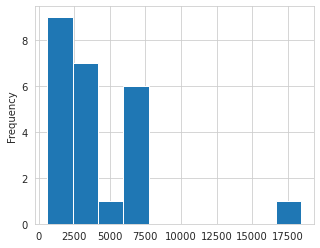

In [37]:
#Pregunta 5 Graficos
df.head()
#cars.index = cars.car_names
credit_amount = df['credit_amount']
prueba = credit_amount.plot(kind = 'hist')
print(prueba)

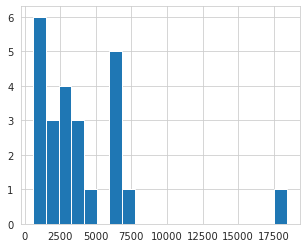

In [45]:
# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
plt.hist(credit_amount, bins=20)
plt.show()
# 

In [46]:
quantiles = df['credit_amount'].quantile([0.25,0.5,0.75])
print(quantiles)
# para los quantiles se ordena
# el 25% de los creditos llega a 1487.
# el 50% llega a 3022.


0.25    1487.25
0.50    3022.00
0.75    6119.50
Name: credit_amount, dtype: float64


<AxesSubplot:>

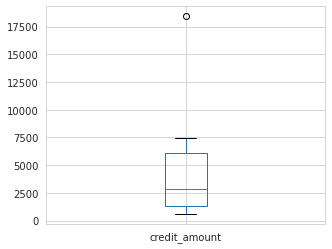

In [58]:
df.boxplot(column='credit_amount')

<AxesSubplot:xlabel='duration', ylabel='credit_amount'>

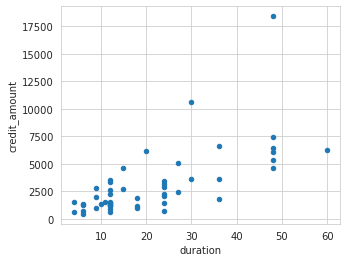

In [61]:
df.head()
df.plot(kind='scatter', x='duration', y='credit_amount')
# la relacion entre las dos variables es directa/ascendente

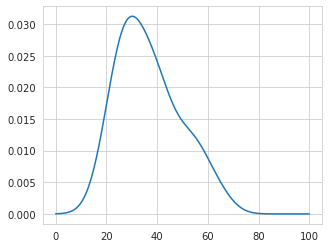

In [67]:
from scipy.stats import gaussian_kde
density = gaussian_kde(df.age)
 
x_vals = np.linspace(0,100,200) # especificando limites
density.covariance_factor = lambda : .5 #constante de suavizamiento
 
density._compute_covariance()
plt.plot(x_vals,density(x_vals))
plt.show()

In [68]:
# Pregunta 6
# Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
df['nueva_columna'] = df['credit_amount']/df['duration']*df['residence_since']
df['nueva_columna']
df

checking_status  duration                    credit_history  \
0    'no checking'        24                   'existing paid'   
1    'no checking'        48  'critical/other existing credit'   
2    'no checking'        12                   'existing paid'   
3    'no checking'        12  'critical/other existing credit'   
4    'no checking'        24                   'existing paid'   
5               <0        12  'critical/other existing credit'   
6    'no checking'        15                   'existing paid'   
7         0<=X<200        11                   'existing paid'   
8               <0        12                   'existing paid'   
9    'no checking'        27              'delayed previously'   
10              <0        30  'critical/other existing credit'   
11   'no checking'        12                   'existing paid'   
12              <0        48             'no credits/all paid'   
13   'no checking'        12  'critical/other existing credit'   
14              <0        12                   'existing paid'   
15        0<=X<200        48                   'existing paid'   
16   'no checking'        18  'critical/other existing credit'   
17        0<=X<200         9                   'existing paid'   
18              <0        12                   'existing paid'   
19        0<=X<200        18  'critical/other existing credit'   
20   'no checking'        18  'critical/other existing credit'   
21   'no checking'        24  'critical/other existing credit'   
22              <0        36                   'existing paid'   
23              <0        36                   'existing paid'   
24              <0         6                   'existing paid'   
25   'no checking'        24                   'existing paid'   
26              <0         6  'critical/other existing credit'   
27   'no checking'         4  'critical/other existing credit'   
28        0<=X<200        12                   'existing paid'   
29              <0         9  'critical/other existing credit'   
30   'no checking'         9                   'existing paid'   
31   'no checking'        15                   'existing paid'   
32              <0        48                   'existing paid'   
33           >=200        10  'critical/other existing credit'   
34        0<=X<200        24                   'existing paid'   
35           >=200        24  'critical/other existing credit'   
36        0<=X<200        20             'no credits/all paid'   
37        0<=X<200        48                        'all paid'   
38              <0        12                   'existing paid'   
39   'no checking'         6  'critical/other existing credit'   
40   'no checking'        24              'delayed previously'   
41   'no checking'        12                   'existing paid'   
42   'no checking'         4                   'existing paid'   
43   'no checking'        12  'critical/other existing credit'   
44   'no checking'        36  'critical/other existing credit'   
45              <0        27  'critical/other existing credit'   
46        0<=X<200        48             'no credits/all paid'   
47        0<=X<200        60                   'existing paid'   
48           >=200        30  'critical/other existing credit'   
49        0<=X<200         6                   'existing paid'   
50        0<=X<200         6                   'existing paid'   

                purpose  credit_amount      savings_status  employment  \
0              radio/tv         3430.0         500<=X<1000         >=7   
1             education         6110.0                <100      1<=X<4   
2              radio/tv            NaN                <100      1<=X<4   
3              radio/tv            NaN                <100         >=7   
4             'new car'            NaN          100<=X<500         >=7   
5             'new car'            NaN                <100      1<=X<4   
6   furniture/equipment            NaN              

In [81]:
#Pregunta 7
#Obtenga una muestra para cada conjunto de Training, Testing y Validation

# select a random sample without replacement
from random import seed
array = seed(0,50) # Generate Data

print(array)
#df.iloc[1:25] 
##df.iloc[1:25,] 
#vector <- 1:50 
#indiceTraning <- sample(vector,25) 
#índice <- c(sample(vector,25), sample(vector,15),sample(vector,10)) 
#df1<- df[índice,] 

None


0          (1.0, 5000.0]
1      (5000.0, 10000.0]
2                    NaN
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9                    NaN
10                   NaN
11                   NaN
12                   NaN
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                   NaN
19                   NaN
20                   NaN
21                   NaN
22                   NaN
23                   NaN
24                   NaN
25                   NaN
26                   NaN
27                   NaN
28         (1.0, 5000.0]
29         (1.0, 5000.0]
30         (1.0, 5000.0]
31         (1.0, 5000.0]
32     (5000.0, 10000.0]
33         (1.0, 5000.0]
34         (1.0, 5000.0]
35         (1.0, 5000.0]
36     (5000.0, 10000.0]
37     (5000.0, 10000.0]
38         (1.0, 5000.0]
39         (1.0, 5000.0]


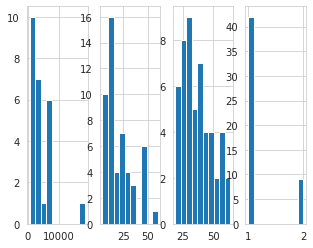

In [102]:
#Pregunta 8
#discretizar duración, credit_amount, age, number_of_dependents.

fig, axs = plt.subplots(1,4) 
axs[0].hist(df.credit_amount)
axs[1].hist(df.duration)
axs[2].hist(df.age)
axs[3].hist(df.num_dependents)
df['credit_amount_discretizado'] = pd.cut(x=df['credit_amount'], bins=[1, 5000, 10000, 15000, 20000]) 
print(df['credit_amount_discretizado']) #

                        duration  credit_amount  installment_commitment  \
duration                1.000000       0.709975                0.185119   
credit_amount           0.709975       1.000000               -0.067336   
installment_commitment  0.185119      -0.067336                1.000000   
residence_since         0.179999      -0.019677                0.266785   
age                     0.108825       0.019121                0.147038   
existing_credits        0.020722      -0.172344                0.182380   
num_dependents         -0.004259      -0.180615               -0.261998   
nueva_columna          -0.025070       0.377632               -0.119385   
foreign_mapeado         0.046602      -0.814008                0.323569   
own_telephone_mapeado   0.376682       0.403539                0.116190   

                        residence_since       age  existing_credits  \
duration                       0.179999  0.108825          0.020722   
credit_amount                 -0

(10.5, -0.5)

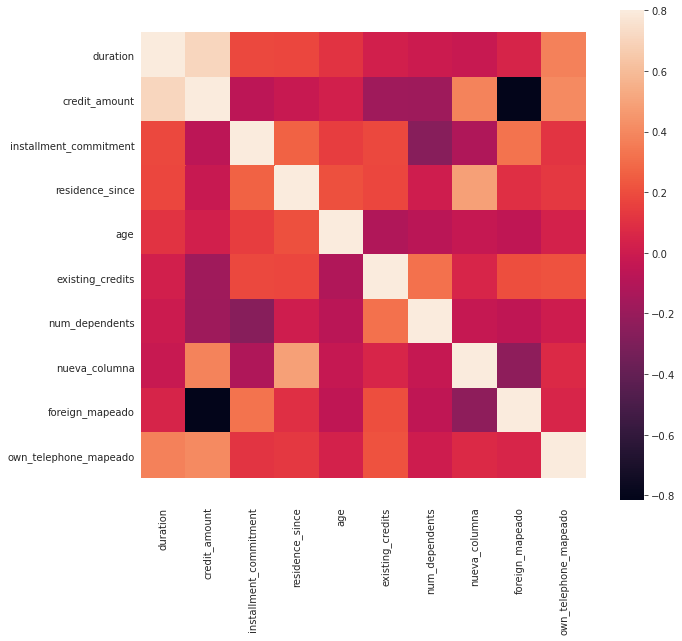

In [103]:
#Pregunta 9
# Obtenga la matriz de correlación de las variables numéricas.
#
df_columnas_numericas = df.select_dtypes(include=[np.number])
corrmat = df_columnas_numericas.corr()
print(corrmat)
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [104]:
#Pregunta 10
#Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

data_crosstab = pd.crosstab(df['job'], df['purpose'], margins = False) 
data_crosstab

purpose                      'new car'  'used car'  business  education  \
job                                                                       
'high qualif/self emp/mgmt'          1           1         1          2   
'unemp/unskilled non res'            0           0         0          0   
'unskilled resident'                 3           0         0          0   
skilled                              6           3         3          3   

purpose                      furniture/equipment  other  radio/tv  repairs  
job                                                                         
'high qualif/self emp/mgmt'                    1      1         0        0  
'unemp/unskilled non res'                      0      1         0        0  
'unskilled resident'                           3      0         3        0  
skilled                                        7      0        11        1

In [105]:
#Pregunta 11
#Mapear a valores diferentes para atributos own_telephone, foreign_worker.

foreign_diccionario = {'yes': 1, 'no': 0}
own_telephone_diccionario = {'yes': 1, 'none': 0}
df['foreign_mapeado'] = df['foreign_worker'].map(foreign_diccionario)
df['own_telephone_mapeado'] = df['own_telephone'].map(own_telephone_diccionario)
df
#del tips['Gender']

checking_status  duration                    credit_history  \
0    'no checking'        24                   'existing paid'   
1    'no checking'        48  'critical/other existing credit'   
2    'no checking'        12                   'existing paid'   
3    'no checking'        12  'critical/other existing credit'   
4    'no checking'        24                   'existing paid'   
5               <0        12  'critical/other existing credit'   
6    'no checking'        15                   'existing paid'   
7         0<=X<200        11                   'existing paid'   
8               <0        12                   'existing paid'   
9    'no checking'        27              'delayed previously'   
10              <0        30  'critical/other existing credit'   
11   'no checking'        12                   'existing paid'   
12              <0        48             'no credits/all paid'   
13   'no checking'        12  'critical/other existing credit'   
14              <0        12                   'existing paid'   
15        0<=X<200        48                   'existing paid'   
16   'no checking'        18  'critical/other existing credit'   
17        0<=X<200         9                   'existing paid'   
18              <0        12                   'existing paid'   
19        0<=X<200        18  'critical/other existing credit'   
20   'no checking'        18  'critical/other existing credit'   
21   'no checking'        24  'critical/other existing credit'   
22              <0        36                   'existing paid'   
23              <0        36                   'existing paid'   
24              <0         6                   'existing paid'   
25   'no checking'        24                   'existing paid'   
26              <0         6  'critical/other existing credit'   
27   'no checking'         4  'critical/other existing credit'   
28        0<=X<200        12                   'existing paid'   
29              <0         9  'critical/other existing credit'   
30   'no checking'         9                   'existing paid'   
31   'no checking'        15                   'existing paid'   
32              <0        48                   'existing paid'   
33           >=200        10  'critical/other existing credit'   
34        0<=X<200        24                   'existing paid'   
35           >=200        24  'critical/other existing credit'   
36        0<=X<200        20             'no credits/all paid'   
37        0<=X<200        48                        'all paid'   
38              <0        12                   'existing paid'   
39   'no checking'         6  'critical/other existing credit'   
40   'no checking'        24              'delayed previously'   
41   'no checking'        12                   'existing paid'   
42   'no checking'         4                   'existing paid'   
43   'no checking'        12  'critical/other existing credit'   
44   'no checking'        36  'critical/other existing credit'   
45              <0        27  'critical/other existing credit'   
46        0<=X<200        48             'no credits/all paid'   
47        0<=X<200        60                   'existing paid'   
48           >=200        30  'critical/other existing credit'   
49        0<=X<200         6                   'existing paid'   
50        0<=X<200         6                   'existing paid'   

                purpose  credit_amount      savings_status  employment  \
0              radio/tv         3430.0         500<=X<1000         >=7   
1             education         6110.0                <100      1<=X<4   
2              radio/tv            NaN                <100      1<=X<4   
3              radio/tv            NaN                <100         >=7   
4             'new car'            NaN          100<=X<500         >=7   
5             'new car'            NaN                <100      1<=X<4   
6   furniture/equipment            NaN              

In [109]:
#Pregunta 12
# Normalizar el campo instalment_commitment por frecuencia.
names = ['installment_commitment'] # or names = df.columns
# Normalize total_bedrooms column
#x_array = np.array(titanic['Fare'])
x_array = np.array(df['installment_commitment'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=names)
normalized_X
normalized_df

installment_commitment
0                 0.134164
1                 0.044721
2                 0.134164
3                 0.178885
4                 0.178885
5                 0.134164
6                 0.089443
7                 0.178885
8                 0.178885
9                 0.134164
10                0.134164
11                0.134164
12                0.134164
13                0.134164
14                0.089443
15                0.134164
16                0.178885
17                0.044721
18                0.134164
19                0.178885
20                0.178885
21                0.178885
22                0.178885
23                0.044721
24                0.178885
25                0.178885
26                0.089443
27                0.089443
28                0.044721
29                0.089443
30                0.089443
31                0.134164
32                0.178885
33                0.178885
34                0.089443
35                0.134164
36                0.134164
37                0.178885
38                0.178885
39                0.044721
40                0.178885
41                0.178885
42                0.044721
43                0.089443
44                0.178885
45                0.178885
46                0.044721
47                0.178885
48                0.178885
49                0.089443
50                0.089443

In [113]:
#Pregunta 13
#Normalizar el campo instalment_commitment en el rango (-1,2)
minimo = df['installment_commitment'].min()
maximo = df['installment_commitment'].max()
minimo,maximo
df['installment_commitment_normalized']= 2-(-1)*((df['installment_commitment'] - minimo)/(maximo - minimo)) + (-1)
df

checking_status  duration                    credit_history  \
0    'no checking'        24                   'existing paid'   
1    'no checking'        48  'critical/other existing credit'   
2    'no checking'        12                   'existing paid'   
3    'no checking'        12  'critical/other existing credit'   
4    'no checking'        24                   'existing paid'   
5               <0        12  'critical/other existing credit'   
6    'no checking'        15                   'existing paid'   
7         0<=X<200        11                   'existing paid'   
8               <0        12                   'existing paid'   
9    'no checking'        27              'delayed previously'   
10              <0        30  'critical/other existing credit'   
11   'no checking'        12                   'existing paid'   
12              <0        48             'no credits/all paid'   
13   'no checking'        12  'critical/other existing credit'   
14              <0        12                   'existing paid'   
15        0<=X<200        48                   'existing paid'   
16   'no checking'        18  'critical/other existing credit'   
17        0<=X<200         9                   'existing paid'   
18              <0        12                   'existing paid'   
19        0<=X<200        18  'critical/other existing credit'   
20   'no checking'        18  'critical/other existing credit'   
21   'no checking'        24  'critical/other existing credit'   
22              <0        36                   'existing paid'   
23              <0        36                   'existing paid'   
24              <0         6                   'existing paid'   
25   'no checking'        24                   'existing paid'   
26              <0         6  'critical/other existing credit'   
27   'no checking'         4  'critical/other existing credit'   
28        0<=X<200        12                   'existing paid'   
29              <0         9  'critical/other existing credit'   
30   'no checking'         9                   'existing paid'   
31   'no checking'        15                   'existing paid'   
32              <0        48                   'existing paid'   
33           >=200        10  'critical/other existing credit'   
34        0<=X<200        24                   'existing paid'   
35           >=200        24  'critical/other existing credit'   
36        0<=X<200        20             'no credits/all paid'   
37        0<=X<200        48                        'all paid'   
38              <0        12                   'existing paid'   
39   'no checking'         6  'critical/other existing credit'   
40   'no checking'        24              'delayed previously'   
41   'no checking'        12                   'existing paid'   
42   'no checking'         4                   'existing paid'   
43   'no checking'        12  'critical/other existing credit'   
44   'no checking'        36  'critical/other existing credit'   
45              <0        27  'critical/other existing credit'   
46        0<=X<200        48             'no credits/all paid'   
47        0<=X<200        60                   'existing paid'   
48           >=200        30  'critical/other existing credit'   
49        0<=X<200         6                   'existing paid'   
50        0<=X<200         6                   'existing paid'   

                purpose  credit_amount      savings_status  employment  \
0              radio/tv         3430.0         500<=X<1000         >=7   
1             education         6110.0                <100      1<=X<4   
2              radio/tv            NaN                <100      1<=X<4   
3              radio/tv            NaN                <100         >=7   
4             'new car'            NaN          100<=X<500         >=7   
5             'new car'            NaN                <100      1<=X<4   
6   furniture/equipment            NaN              

In [ ]:
#Pregunta 14

In [ ]:
#Pregunta 15

In [ ]:
#Pregunta 16

In [ ]:
#Pregunta17

In [ ]:
#Pregunta 18